# ESTATÍSTICAS DESCRITIVAS - semana 1

In [35]:
# similar ao library em R
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np

In [8]:
df = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/Gradua%C3%A7%C3%A3o/dados/diamonds.csv")

# similar ao head do R
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
# similar ao mean(df$price), median, std
df[['price']].mean()

price    3932.799722
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9b664ac5d0>]],
      dtype=object)

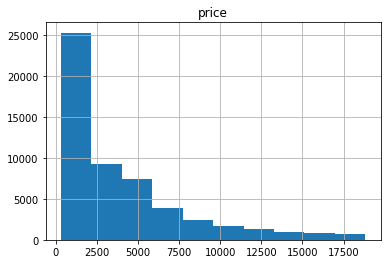

In [11]:
# similar ao hist(df$price)
df[['price']].hist()

In [12]:
# amostra - similar df[1:3000,]
a1 = df.iloc[0:2999, :]
a1.head


<bound method NDFrame.head of       Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0              1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1              2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2              3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3              4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4              5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
...          ...    ...        ...   ...     ...    ...    ...    ...   ...   
2994        2995   0.90       Good     I     VS2   63.8   55.0   3303  6.07   
2995        2996   0.90       Good     G     SI2   63.8   59.0   3303  6.02   
2996        2997   0.90       Good     I     VS2   63.7   61.0   3303  6.06   
2997        2998   0.90       Good     G     SI2   63.4   59.0   3303  6.04   
2998        2999   0.90  Very Good     G     SI2   59.2   57.0   3303  6.30   

         y     z  
0 

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


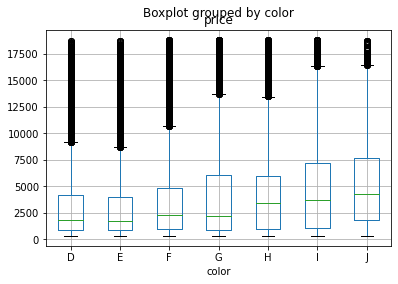

In [14]:
# similar boxplot(df$price ~ color)
df.boxplot(['price'], by='color')

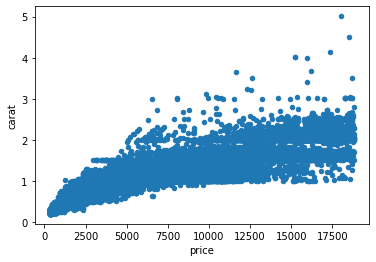

In [15]:
# similar plot(df$price ~ df$carat)
df.plot.scatter(x='price', y='carat')

In [16]:
# similar cor(df$price, df$carat)
df[['price', 'carat']].corr()

,price,carat
price,1.000000,0.921591
carat,0.921591,1.000000


# REGRESSÕES LINEARES - semana 2

In [17]:
dfpib = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/Gradua%C3%A7%C3%A3o/dados/pib.csv")
dfpib.head()

,Unnamed: 0,ANO_MES,PIB,BRL,BRP,BRT,SLP,SPP,SPT,PRL,...,PIBi3,PIBi4,PIBi5,PIBi6,PIBi7,PIBi8,PIBi9,PIBi10,PIBi11,PIBi12
0,1,jan/04,103.09,109.19,108.67,109.08,102.84,114.27,105.38,127.49,...,106.27,104.52,102.59,102.24,99.96,101.93,101.17,101.70,100.03,100.00
1,2,fev/04,102.05,95.65,104.52,97.63,90.76,109.83,94.99,96.60,...,104.10,106.27,104.52,102.59,102.24,99.96,101.93,101.17,101.70,100.03
2,3,mar/04,110.43,91.69,125.53,99.26,89.78,133.24,99.43,83.79,...,103.91,104.10,106.27,104.52,102.59,102.24,99.96,101.93,101.17,101.70
3,4,abr/04,106.77,95.36,118.34,100.49,94.58,123.55,101.02,91.79,...,103.09,103.91,104.10,106.27,104.52,102.59,102.24,99.96,101.93,101.17
4,5,mai/04,108.08,92.47,121.49,98.96,91.34,128.32,99.55,85.73,...,102.05,103.09,103.91,104.10,106.27,104.52,102.59,102.24,99.96,101.93


In [24]:
# seração treino e teste
treino = dfpib.iloc[0:125]
teste = dfpib.iloc[126:137]

In [44]:
# Similar mod <- lm(PIB~BRP, data=treino)
mod = LinearRegression()

# no python separamos antes variável Y das variáveis X
Y = treino.iloc[:,[2]]
# X = treino.iloc[:,[4]] #REGRESSÃO LINEAR SIMPLES 
# X = treino.loc[:,['PIBi1', 'PIBi2']] # AUTOREGRESSIVO
X = treino.loc[:,['BRP', 'D1', 'D2']] # RLM DUMMY
mod.fit(X,Y)

LinearRegression()

In [45]:
# visualização dos parâmetros da regressão, similar ao summary(mod)
modV = sm.OLS(Y, X).fit()
print(modV.summary())

                                 OLS Regression Results                                
Dep. Variable:                    PIB   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          3.794e+04
Date:                Wed, 20 Apr 2022   Prob (F-statistic):                   5.71e-181
Time:                        23:07:00   Log-Likelihood:                         -360.47
No. Observations:                 125   AIC:                                      726.9
Df Residuals:                     122   BIC:                                      735.4
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [46]:
# similar p = predict(mod, newdata=teste)
# X_teste = teste.iloc[:,[4]] #RLS
# X_teste = teste.loc[:,['PIBi1', 'PIBi2']]
X_teste = teste.loc[:,['BRP', 'D1', 'D2']]
Y_prev = mod.predict(X_teste)
Y_prev

array([[151.620177  ],
       [151.49304858],
       [151.42524675],
       [158.98515026],
       [146.62826762],
       [141.03461704],
       [142.84296193],
       [131.19695851],
       [149.6623993 ],
       [138.35644495],
       [140.98376567]])

In [47]:
# Cálculo do erro de previsão
Y_real = teste.iloc[:,[2]].to_numpy()
Y_real

array([[154.34],
       [154.75],
       [154.04],
       [156.65],
       [151.46],
       [150.7 ],
       [149.51],
       [144.42],
       [151.68],
       [147.03],
       [148.94]])

In [48]:
erro = Y_real - Y_prev
erro_abs_medio = np.mean(abs(erro))
print(erro_abs_medio)

5.814660263863382
